In [14]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass

In [4]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [5]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [6]:
# Network configuration

data = building_sizes
batch_size = 4

length = 4
width = 3
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [7]:
def basic_visualization(map_):
    plt.imshow(map_);
    plt.colorbar()
    plt.show()

In [8]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    global dim
    dim = len(data[0])
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader

In [9]:
def map_view_for_coding(map_):
    return torch.transpose(map_, 0, 1).view(dim, length, width)
#     return map_.view(dim, length, width)

In [10]:
def map_display(map_):
#     return torch.transpose(map_, 0, 1).view(dim, length, width)
    if dim == 1:
        return map_.view(length, width)
    else:
        return map_.view(dim, length, width)

In [11]:
def cycle(map_, training_data, display_step=False):
    for batch in training_data:
#         type(batch)
#         print(batch)
        for row in batch[0]:
#             type(row)
#             print(row)
            i_bmu = map_.find_bmu(row).item()
            map_.move_closer(i_bmu, row)
        
#     print(map_view(map_.map))
    if display_step == True:
        basic_visualization(map_display(map_.map))
        print(map_display(map_.map))

In [12]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [15]:
training = load_data(data)

In [16]:
map1 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


In [17]:
map1.map

tensor([[0.8197, 0.5005],
        [0.1023, 0.8135],
        [0.9029, 0.4530],
        [0.1474, 0.2567],
        [0.8892, 0.5201],
        [0.0311, 0.9091],
        [0.5957, 0.6987],
        [0.0995, 0.1963],
        [0.5130, 0.0463],
        [0.0274, 0.4210],
        [0.7819, 0.9499],
        [0.4559, 0.6844]])

In [20]:
map1.distance_matrix

tensor([[0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361, 2.8284,
         3.0000, 3.1623, 3.6056],
        [1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361,
         3.1623, 3.0000, 3.1623],
        [2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000, 2.8284, 2.2361, 2.0000,
         3.6056, 3.1623, 3.0000],
        [1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361,
         2.0000, 2.2361, 2.8284],
        [1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142,
         2.2361, 2.0000, 2.2361],
        [2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000,
         2.8284, 2.2361, 2.0000],
        [2.0000, 2.2361, 2.8284, 1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000,
         1.0000, 1.4142, 2.2361],
        [2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000,
         1.4142, 1.0000, 1.4142],
        [2.8284, 2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000,

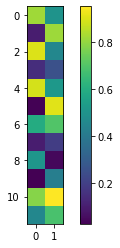

In [23]:
basic_visualization(map1.map)

In [30]:
from torch.distributions.normal import Normal

In [26]:
import torch.distributions.distribution.Distribution

In [63]:
dist = Normal(torch.tensor([100.0]), torch.tensor([10.0]))

In [58]:
dist.cdf(84)

tensor([0.0548])

In [65]:
dist.icdf(torch.tensor([84.0]))

tensor([nan])

In [42]:
dist.mean

tensor([100.])

In [56]:
dist.sample()

tensor([84.3790])

In [59]:
dist.log_prob(100)

tensor([-3.2215])

In [60]:
dist.probs(100)

AttributeError: 'Normal' object has no attribute 'probs'

In [66]:
dist.variance

tensor([100.])

In [67]:
dist

Normal(loc: tensor([100.]), scale: tensor([10.]))

In [69]:
from scipy.stats import norm


In [77]:
print(norm.cdf(1, 100, 10))

2.0813752194932085e-23


In [75]:
print(norm.cdf(-10000, 0, 10))

0.0


In [78]:
dist.cdf(1)

tensor([0.])